<a href="https://colab.research.google.com/github/SagarHadge0/NLP-projects/blob/main/fbprophetipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
data = pd.read_csv("Google_Stock_Price_Train.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
df = data[['Date','Open']]

In [ ]:
df

,Date,Open
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04
...,...,...
1253,12/23/2016,790.90
1254,12/27/2016,790.68
1255,12/28/2016,793.70
1256,12/29/2016,783.33


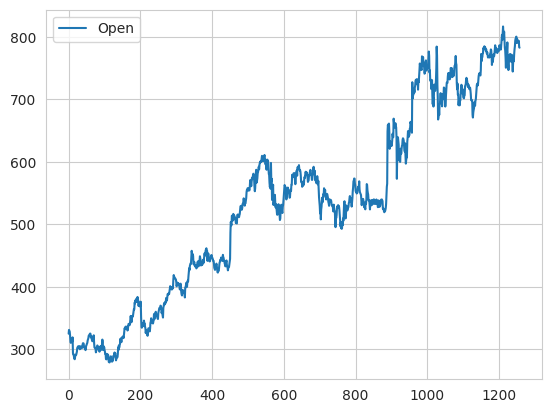

In [ ]:
df.plot()
plt.show()

In [ ]:
df.columns = ['ds','y']

In [ ]:
df

,ds,y
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04
...,...,...
1253,12/23/2016,790.90
1254,12/27/2016,790.68
1255,12/28/2016,793.70
1256,12/29/2016,783.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1258 non-null   object 
 1   y       1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [ ]:
df["ds"] = pd.to_datetime(df['ds'])

<ipython-input-11-66ab294dcb71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ds"] = pd.to_datetime(df['ds'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1258 non-null   datetime64[ns]
 1   y       1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [ ]:
df

,ds,y
0,2012-01-03,325.25
1,2012-01-04,331.27
2,2012-01-05,329.83
3,2012-01-06,328.34
4,2012-01-09,322.04
...,...,...
1253,2016-12-23,790.90
1254,2016-12-27,790.68
1255,2016-12-28,793.70
1256,2016-12-29,783.33


In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe650_3wu/bpy9rzon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe650_3wu/nbtyv403.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95672', 'data', 'file=/tmp/tmpe650_3wu/bpy9rzon.json', 'init=/tmp/tmpe650_3wu/nbtyv403.json', 'output', 'file=/tmp/tmpe650_3wu/prophet_model1kjck_bl/prophet_model-20240409064436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:44:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
futures_date = model.make_future_dataframe(periods=365)

In [ ]:
futures_date

,ds
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09
...,...
1618,2017-12-26
1619,2017-12-27
1620,2017-12-28
1621,2017-12-29


In [ ]:
prediction = model.predict(futures_date)

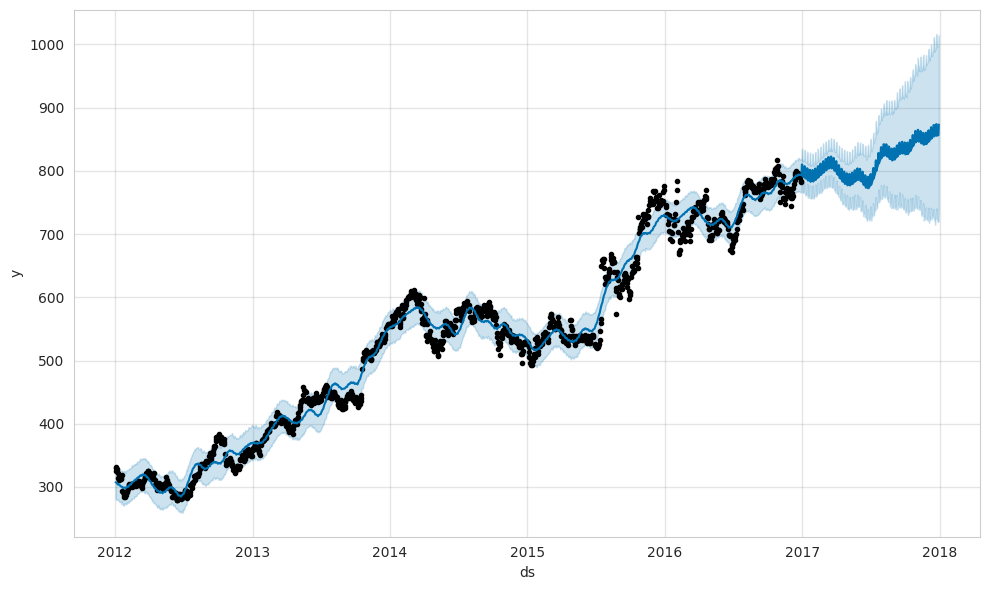

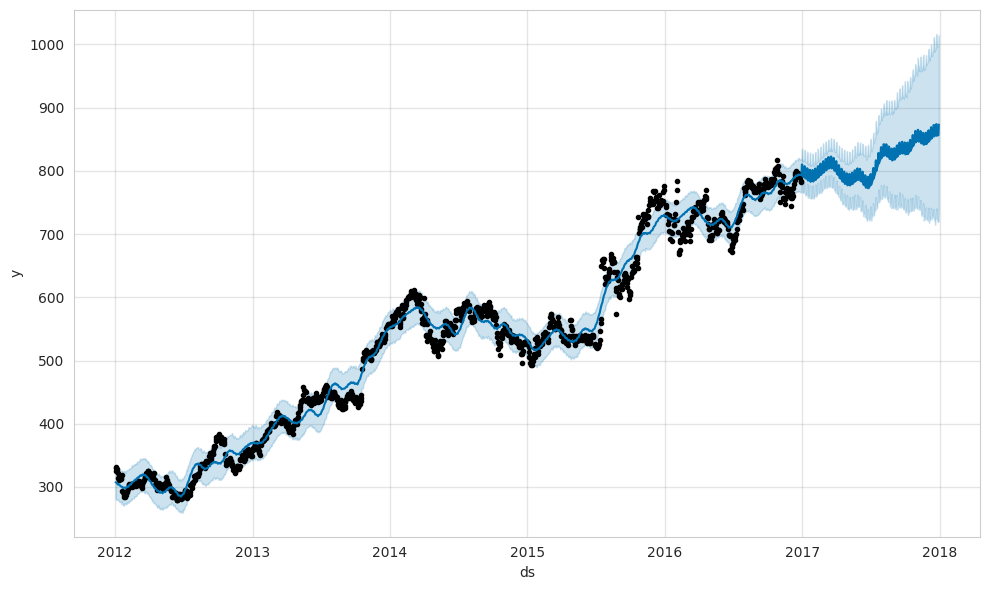

In [ ]:
model.plot(prediction)